In [1]:
from numpy import *
from sympy import *
init_printing()

In [2]:
# state
x, y, z, vx, vy, vz = symbols('x y z v_x v_y v_z')
r                      = Matrix([x, y, z])
v                      = Matrix([vx, vy, vz])
s                      = Matrix([r, v])
latex(s)

'\\left[\\begin{matrix}x\\\\y\\\\z\\\\v_{x}\\\\v_{y}\\\\v_{z}\\end{matrix}\\right]'

In [3]:
# costate
lx, ly, lz, lvx, lvy, lvz = symbols(
    '\\lambda_x \\lambda_y \\lambda_z \\lambda_{v_x} \\lambda_{v_y} \\lambda_{v_z}')
lr                            = Matrix([lx, ly, lz])
lv                            = Matrix([lvx, lvy, lvz])
l                             = Matrix([lr, lv])

In [4]:
# fullstate
fs = Matrix([s, l])

In [5]:
# control: throttle and direction
u, ux, uy, uz = symbols("u, u_x, u_y u_z")
i = Matrix([ux, uy, uz])

In [6]:
# physical parametres
mass, gravity, density, CD, radius, thrust = symbols("m g \\rho C_D r T_{max}")

# optimisation parametres
alpha = symbols("\\alpha")

In [7]:
# gravity
g = Matrix([0, 0, -gravity])

# planaform area
A = pi*radius**2

# volumetric displacement
V = Rational(4,3)*pi*radius**3

# velocity magnitude
vmag = sqrt(v[0]**2 + v[1]**2 + v[2]**2)

# velocity direction
vhat = v/vmag

# gravity
ag = mass*g

# fluid drag
ad = - Rational(1,2)*density*vmag**2*vhat*CD*A

# buoyancy
ab = -density*V*g

# thrust
at = thrust*u*i/mass

In [8]:
# rate of change of position
dr = v

# rate of change of velocity
dv = ag + ad + ab + at

# state equations of motion
ds = Matrix([dr, dv])
latex(ds)

'\\left[\\begin{matrix}v_{x}\\\\v_{y}\\\\v_{z}\\\\- \\frac{\\pi C_{D}}{2} \\rho r^{2} v_{x} \\sqrt{v_{x}^{2} + v_{y}^{2} + v_{z}^{2}} + \\frac{T_{max} u}{m} u_{x}\\\\- \\frac{\\pi C_{D}}{2} \\rho r^{2} v_{y} \\sqrt{v_{x}^{2} + v_{y}^{2} + v_{z}^{2}} + \\frac{T_{max} u}{m} u_{y}\\\\- \\frac{\\pi C_{D}}{2} \\rho r^{2} v_{z} \\sqrt{v_{x}^{2} + v_{y}^{2} + v_{z}^{2}} + \\frac{T_{max} u}{m} u_{z} + \\frac{4 \\pi}{3} \\rho g r^{3} - g m\\end{matrix}\\right]'

In [9]:
# Lagrangian
L = alpha*u + (1 - alpha)*u**2
latex(L)

'\\alpha u + u^{2} \\left(- \\alpha + 1\\right)'

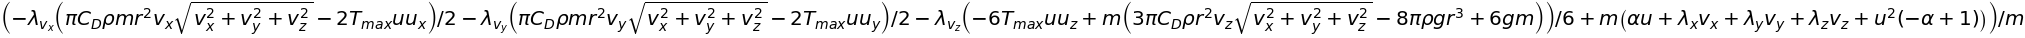

In [14]:
# Hamiltonian
H = l.dot(ds) + L
simplify(H)

In [15]:
# costate equations of motion
dl = Matrix([H.diff(dim) for dim in s])

In [16]:
# full state equations of motion
dfs = Matrix([ds, dl])

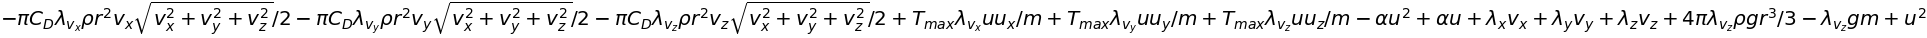

In [17]:
expand(H)

In [18]:
# Hamiltonian terms dependant on thrust direction
Hi = thrust*u/mass * lv.dot(i)
Hi

In [19]:
# optimal thrust direction minimising Hamiltonian terms dependant on thrust direction
lvmag = sqrt(lvx**2 + lvy**2 + lvz**2)
i = -lv/lvmag
latex(simplify(i))

'\\left[\\begin{matrix}- \\frac{\\lambda_{v_x}}{\\sqrt{\\lambda_{v_x}^{2} + \\lambda_{v_y}^{2} + \\lambda_{v_z}^{2}}}\\\\- \\frac{\\lambda_{v_y}}{\\sqrt{\\lambda_{v_x}^{2} + \\lambda_{v_y}^{2} + \\lambda_{v_z}^{2}}}\\\\- \\frac{\\lambda_{v_z}}{\\sqrt{\\lambda_{v_x}^{2} + \\lambda_{v_y}^{2} + \\lambda_{v_z}^{2}}}\\end{matrix}\\right]'

In [20]:
# substitute optimal thrust
at = thrust*u*i/mass
dv = ag + ad + ab + at
ds = Matrix([dr, dv])
H = l.dot(ds) + L
dl = Matrix([H.diff(dim) for dim in s])
dfs = Matrix([ds, dl])

latex(H)

'\\alpha u + \\lambda_x v_{x} + \\lambda_y v_{y} + \\lambda_z v_{z} + \\lambda_{v_x} \\left(- \\frac{\\pi C_{D}}{2} \\rho r^{2} v_{x} \\sqrt{v_{x}^{2} + v_{y}^{2} + v_{z}^{2}} - \\frac{T_{max} \\lambda_{v_x} u}{m \\sqrt{\\lambda_{v_x}^{2} + \\lambda_{v_y}^{2} + \\lambda_{v_z}^{2}}}\\right) + \\lambda_{v_y} \\left(- \\frac{\\pi C_{D}}{2} \\rho r^{2} v_{y} \\sqrt{v_{x}^{2} + v_{y}^{2} + v_{z}^{2}} - \\frac{T_{max} \\lambda_{v_y} u}{m \\sqrt{\\lambda_{v_x}^{2} + \\lambda_{v_y}^{2} + \\lambda_{v_z}^{2}}}\\right) + \\lambda_{v_z} \\left(- \\frac{\\pi C_{D}}{2} \\rho r^{2} v_{z} \\sqrt{v_{x}^{2} + v_{y}^{2} + v_{z}^{2}} - \\frac{T_{max} \\lambda_{v_z} u}{m \\sqrt{\\lambda_{v_x}^{2} + \\lambda_{v_y}^{2} + \\lambda_{v_z}^{2}}} + \\frac{4 \\pi}{3} \\rho g r^{3} - g m\\right) + u^{2} \\left(- \\alpha + 1\\right)'

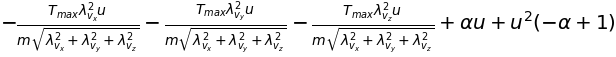

In [21]:
# Hamiltonian terms dependant on thrust magnitude
Hu = (-thrust/mass/lvmag*u*lv).dot(lv) + L
Hu

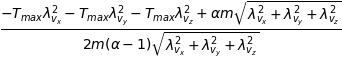

In [22]:
ustar = solve(Hu.diff(u), u)[0]
simplify(ustar)

In [ ]:
dfs = dfs.subs(u, symbols("u^*"))
latex(dfs, mode='equation', itex=True)

In [ ]:
simplify(at)

In [ ]:
# save
f = open("auv.tex", "w")
f.write(latex(ds))
f.close()